Load Data

In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Cleaning

In [ ]:
df = df.drop_duplicates()
df = df.dropna(subset=["CustomerID"])

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

df['Sales'] = df['Quantity'] * df['UnitPrice']


Descriptive Stats

In [ ]:
print(df['Sales'].describe())
print(df['Quantity'].describe())
print("Most common product:", df['Description'].mode()[0])


count    401604.000000
mean         20.613638
std         430.352218
min     -168469.600000
25%           4.250000
50%          11.700000
75%          19.800000
max      168469.600000
Name: Sales, dtype: float64
count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64
Most common product: WHITE HANGING HEART T-LIGHT HOLDER


Visualizations

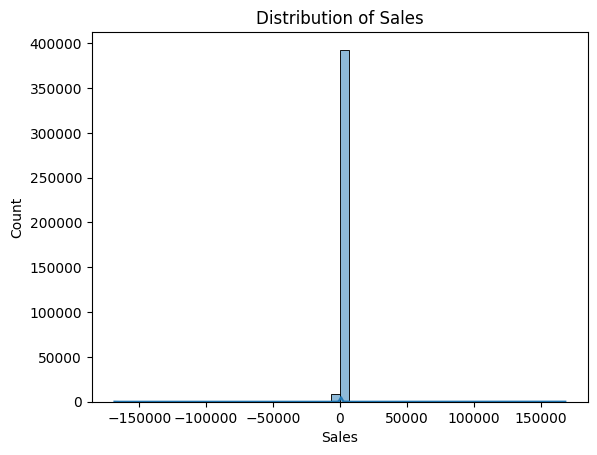

/tmp/ipython-input-660064110.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="mako")


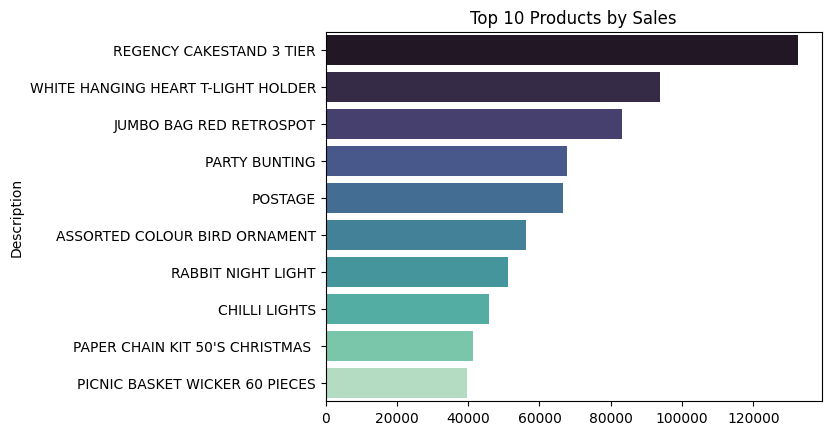

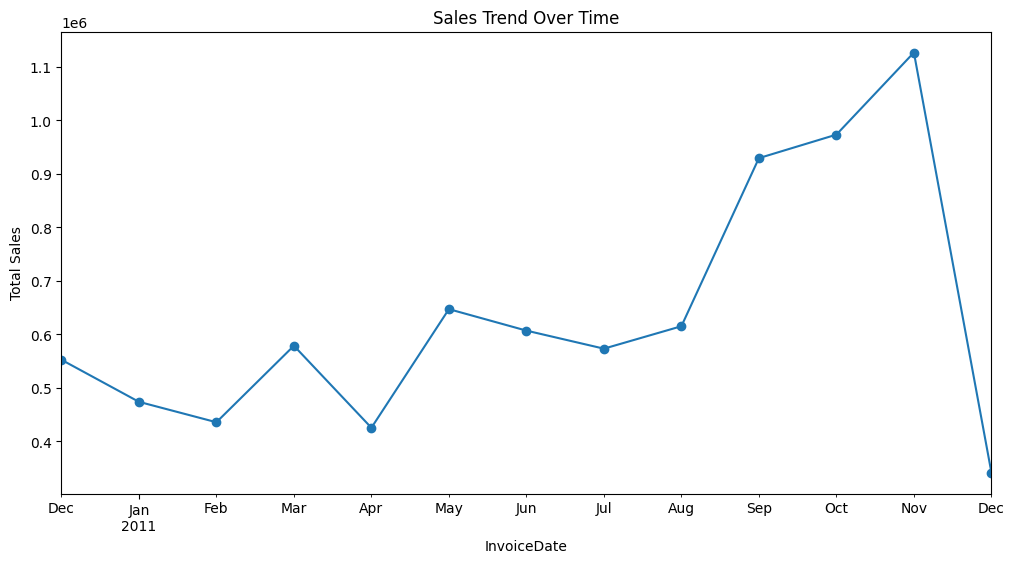

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Distribution of Sales")
plt.show()

# Top products
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="mako")
plt.title("Top 10 Products by Sales")
plt.show()

# Sales trend
sales_time = df.groupby(df['InvoiceDate'].dt.to_period("M"))['Sales'].sum()
sales_time.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Sales Trend Over Time")
plt.ylabel("Total Sales")
plt.show()
